In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.definitions import ROOT_DIR
from src.data.utils import head, line_count
from src.data.quality import check_grid_spacing

from src.visualization.visualize import plot_cartesian_gridded_surface

In [3]:
%matplotlib ipympl

In [4]:
# Downloaded files directory
dst_dir = ROOT_DIR / "data/external/"

well_tops_path = dst_dir / "groningen/Formation_tops/Groningen__Formation_tops__EPSG_28992.csv"

In [5]:
head(well_tops_path)

X,Y,Z,TWT picked,TWT auto,Geological age,MD,Type,Surface,Well,Interpreter,Confidence factor,Dip angle,Dip azimuth,Missing,TVT,TST,TVT zone,TST zone,Observation number,Used by dep.conv.,Used by geo mod,Zone log,Edited by user,Symbol,Locked to fault,"FLOAT,Continuous","FLOAT,Carb_net2","FLOAT,SH_WS_belowcontact",PVD auto
256256.0,591586.0,-2824.0,,-1875.9,,2831.5,Horizon,USS_3.1_T,AMR-  1,Clemens.Visser,,,,,,,,,,False,False,0.0,False,0.0,0.0,,,,-2824.0
256634.0,591613.0,-2790.0,,,,2818.75,Horizon,USS_3.1_T,AMR-  2,Jose.Viota,,,,,,,,,,False,True,0.0,False,0.0,0.0,,,,-2790.0
256627.0,591617.0,-2789.0,,,,2828.31,Horizon,USS_3.1_T,AMR-  3,Jose.Viota,,,,,,,,,,False,True,0.0,False,0.0,0.0,,,,-2789.0
256583.0,591606.0,-2786.0,,,,2829.86,Horizon,USS_3.1_T,AMR-  4,Jose.Viota,,,,,,,,,,False,True,0.0,False,0.0,0.0,,,,-2786.0
256533.0,591778.0,-2791.0,,,,2888.83,Horizon,USS_3.1_T,AMR-  5B,Jose.Viota,,,,,,,,,,False,True,0.0,False,0.0,0.0,,,,-2791.0
256277.0,591831.0,-2785.0,,,,2880.7,Horizon,USS_3.1_

In [6]:
line_count(well_tops_path)

Line count: 7,677


In [7]:
well_tops = pd.read_csv(well_tops_path)

In [8]:
is_ro_top = well_tops["Surface"] == "RO____T"
ro_well_tops = well_tops.loc[is_ro_top, :]

In [9]:
np.sum(~ro_well_tops["TWT auto"].isna())

184

In [10]:
ro_well_tops = ro_well_tops.rename(columns={"X": "easting", "Y": "northing", "Z": "depth"})

In [11]:
interp_RO_T_path = dst_dir / "groningen/Horizon_Interpretation/RO____T"
col_names = ["inline", "xline", "easting", "northing", "depth"]
ro_t = pd.read_csv(interp_RO_T_path, sep=r"\s+", header=None, names=col_names)

In [12]:
ro_t["depth"] = -ro_t["depth"]

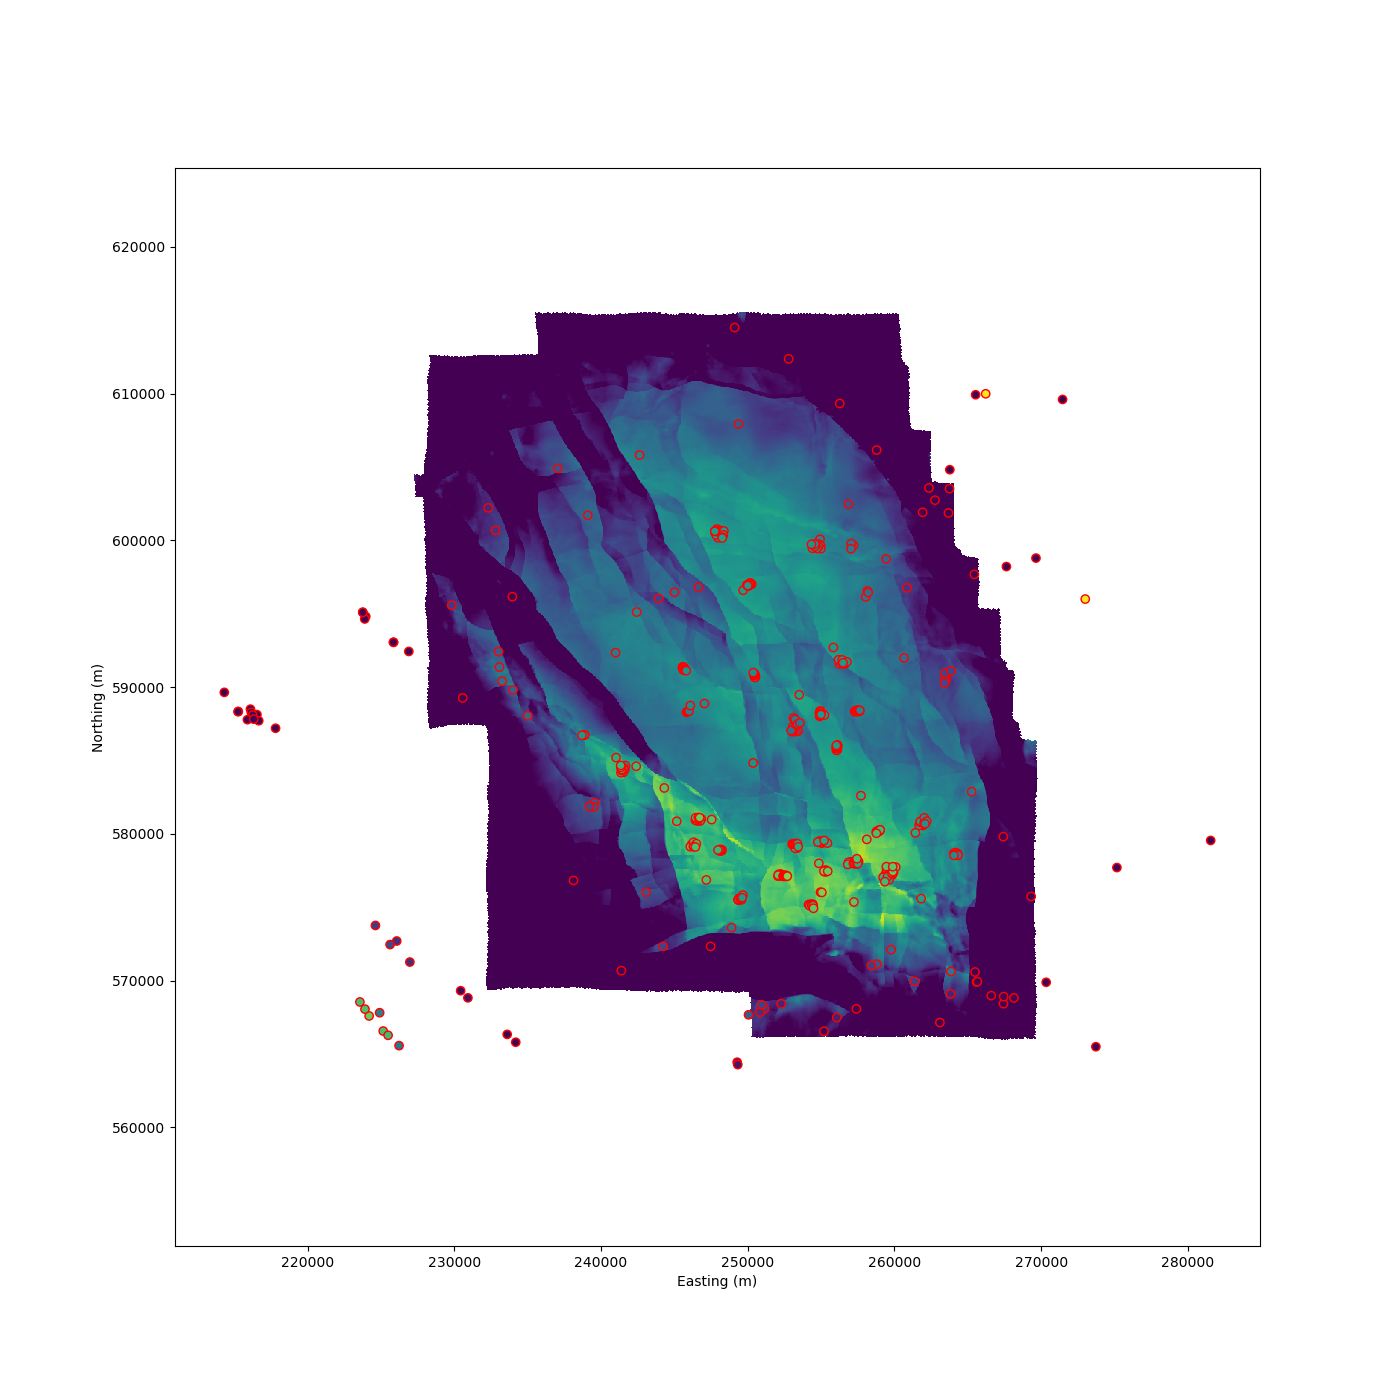

In [13]:
title = "Top Rotliegend with well tops"
fig, ax = plt.subplots(figsize=(14, 14))

im = plot_cartesian_gridded_surface(
    ro_t,
    ax=ax,
    cmap="viridis",
    vmin=-3000,
    vmax=-2500,
    alpha=1
    )

scatter = ax.scatter(
    ro_well_tops.easting,
    ro_well_tops.northing,
    c=ro_well_tops.depth,
    cmap="viridis",
    vmin=-3000,
    vmax=-2500,
    alpha=1,
    edgecolors="red"
    )
plt.show()